In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


In [3]:
# Define the base directory for the dataset
base_dir = 'C:/Users/kiran/Desktop/hacatahaon/Fruit And Vegetable Diseases Dataset/'

# ImageDataGenerator to load and augment images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Using 20% for validation

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Load 32 images at a time
    class_mode='binary',  # 'binary' for Rotten vs Healthy
    subset='training'  # Use the 'training' subset
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use the 'validation' subset
)


Found 46846 images belonging to 29 classes.
Found 11699 images belonging to 29 classes.


In [4]:
# Define a simple CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Rotten vs Healthy)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


c:\Users\kiran\Desktop\hacatahaon\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Train for 10 epochs (you can adjust)
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)



c:\Users\kiran\Desktop\hacatahaon\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 847/1463 ━━━━━━━━━━━━━━━━━━━━ 5:41 554ms/step - accuracy: 0.0489 - loss: -109655059142279168.0000

c:\Users\kiran\Desktop\hacatahaon\.venv\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1463/1463 ━━━━━━━━━━━━━━━━━━━━ 944s 644ms/step - accuracy: 0.0494 - loss: -3168218291302825984.0000 - val_accuracy: 0.0501 - val_loss: -144854570063116632064.0000
Epoch 2/10
   1/1463 ━━━━━━━━━━━━━━━━━━━━ 9:28 389ms/step - accuracy: 0.0625 - loss: -155152367270448070656.0000

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1463/1463 ━━━━━━━━━━━━━━━━━━━━ 1s 184us/step - accuracy: 0.0625 - loss: -155152367270448070656.0000 - val_accuracy: 0.0000e+00 - val_loss: -146218105219047227392.0000
Epoch 3/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 1826s 1s/step - accuracy: 0.0504 - loss: -686532245633567293440.0000 - val_accuracy: 0.0499 - val_loss: -5345618509401541312512.0000
Epoch 4/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 1s 221us/step - accuracy: 0.0625 - loss: -5826542713959694204928.0000 - val_accuracy: 0.1053 - val_loss: -4998790672598205202432.0000
Epoch 5/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 1194s 816ms/step - accuracy: 0.0504 - loss: nan - val_accuracy: 0.0417 - val_loss: nan
Epoch 6/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 1s 162us/step - accuracy: 0.0312 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 834s 570ms/step - accuracy: 0.0415 - loss: nan - val_accuracy: 0.0415 - val_loss: nan
Epoch 8/10
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 1s 120us/step - accuracy: 0.0312 - loss: nan - val_ac

In [6]:
# Save the trained model
model.save('food_classification_model.h5')

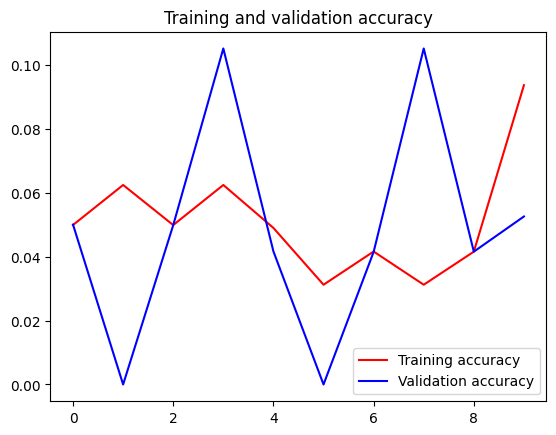

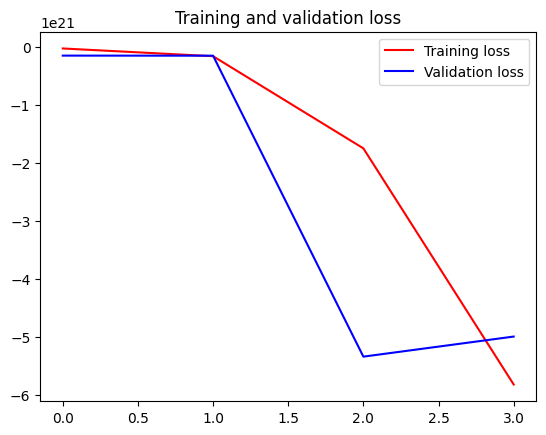

In [7]:
# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('food_classification_model.h5')

# Specify the image path
img_path = "Fruit And Vegetable Diseases Dataset\Grape__Rotten\RottenGrape (7).jpg"  # Update this path as needed

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Predict the class (multi-class)
prediction = model.predict(img_array)

# Print the predicted probabilities (optional for debugging)
print("Predicted probabilities:", prediction)

# Get the index of the highest probability
predicted_class = np.argmax(prediction, axis=1)

# Mapping class indices back to the folder names (classes)
class_indices = {
    'Apple__Healthy': 0, 'Apple__Rotten': 1,
    'Banana__Healthy': 2, 'Banana__Rotten': 3,
    'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5,
    'Carrot__Healthy': 6, 'Carrot__Rotten': 7,
    'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9,
    'Grape__Healthy': 10, 'Grape__Rotten': 11,
    'Guava__Healthy': 12, 'Guava__Rotten': 13,
    'Jujube__Healthy': 14, 'Jujube__Rotten': 15,
    'Mango__Healthy': 16, 'Mango__Rotten': 17,
    'Orange__Healthy': 18, 'Orange__Rotten': 19,
    'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21,
    'Potato__Healthy': 22, 'Potato__Rotten': 23,
    'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25,
    'Tomato__Healthy': 26, 'Tomato__Rotten': 27
}

# Reverse the dictionary to map indices back to class names
class_labels = {v: k for k, v in class_indices.items()}

# Get the predicted class label
predicted_label = class_labels[predicted_class[0]]

# Simplified output to just show "Fresh" or "Rotten"
if 'Rotten' in predicted_label:
    print("Predicted status: Rotten")
else:
    print("Predicted status: Fresh")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted probabilities: [[nan]]
Predicted status: Fresh


In [15]:
print(train_generator.class_indices)


{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Healthy copy': 15, 'Jujube__Rotten': 16, 'Mango__Healthy': 17, 'Mango__Rotten': 18, 'Orange__Healthy': 19, 'Orange__Rotten': 20, 'Pomegranate__Healthy': 21, 'Pomegranate__Rotten': 22, 'Potato__Healthy': 23, 'Potato__Rotten': 24, 'Strawberry__Healthy': 25, 'Strawberry__Rotten': 26, 'Tomato__Healthy': 27, 'Tomato__Rotten': 28}
